---
title: "The Price of Neglect: A Global Look at Child Deprivation"
author: "Simran Dureja"
format:
  html:
    theme: sandstone
    toc: true
    embed-resources: true
    self-contained: true
    code-fold: true
    df-print: paged
    fig-format: png
    fig-dpi: 300
execute:
  echo: false
  warning: false
  message: false
  freeze: auto
fontsize: "16px"
linestretch: 1.5
---

In [1]:
#| echo: false
#| warning: false
#| message: false

import pandas as pd
import polars as pl
import geopandas as gpd
from plotnine import *
from sklearn.linear_model import LinearRegression
import numpy as np


##  **Executive Summary**

Around the world today, economic growth is celebrated as a marker of progress. Yet hidden behind the rise of global GDP and technology lies a sobering truth: millions of children are still deprived of the basic conditions they need to survive, learn, and thrive.

This report, drawing on UNICEF’s latest data, sets out to map where child deprivation is most severe, explore how factors like national income and birth rates shape this deprivation, and understand whether the world is moving closer to solving this crisis or drifting further away.

Our analysis shows that child deprivation remains a deeply unequal burden. Some of the poorest countries have managed to improve child well-being despite limited resources, while in other cases, economic wealth has failed to protect children from hardship. Fertility patterns, healthcare access, government policies, and social protections all play crucial roles beyond simple economic indicators.

Most critically, the global average child deprivation has not fallen consistently. After modest progress, recent years show worrying signs of stagnation, warning us that progress is neither guaranteed nor equally shared.

Child deprivation is not merely a matter of numbers — it is the daily reality of children denied safe shelter, nutritious food, education, and hope. Unless addressed urgently, these deprivations will echo for generations.

:::{.callout-note title="Indicator Definition"}
**Child deprivation here refers to the lack of basic needs like nutrition, education, shelter, and water.**  
:::


::: {.callout-important}
### **Why This Matters**
**Over 330 million children worldwide face some form of deprivation.**  
**This map shows the changing burden of inequality across nations over time.**
:::


## Where Are Children Most Deprived?

Children born into different countries experience vastly different levels of well-being.

This **interactive world map** reveals the **latest child deprivation rates** across countries. Hover over any nation to see key metrics like GDP, GNI, and life expectancy.

> 📍 Use your mouse to explore the disparities.



In [2]:
#| echo: false
#| output: true
#| fig-cap: "Child Deprivation Across the World (Latest Year)"
#| fig-width: 10
#| fig-height: 6

import pandas as pd
import plotly.express as px


df = pd.read_csv("unicef_indicator_1.csv")
meta = pd.read_csv("unicef_metadata.csv")


df = df[df["sex"] == "Total"]
df = df.rename(columns={"obs_value": "deprivation", "time_period": "year"})


merged = pd.merge(df, meta, on=["country", "year"], how="left")


merged = merged.dropna(subset=["alpha_3_code_x", "deprivation"])


fig = px.choropleth(
    merged,
    locations="alpha_3_code_x",
    color="deprivation",
    hover_name="country",
    animation_frame="year",
    color_continuous_scale=["navy", "lightblue", "peachpuff", "khaki", "coral"],
    labels={"deprivation": "Child Deprivation (%)"},
    title="🌍 How Child Deprivation Changes Over Time",
    projection="natural earth",
)

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        coastlinecolor="gray",
        landcolor="white",
        showland=True
    ),
    coloraxis_colorbar=dict(
        title="Deprivation %",
        tickformat=".0f"
    ),
    plot_bgcolor="white",
    paper_bgcolor="white",
    font=dict(family="Arial", size=14, color="black"),
    title_font=dict(size=22, color="navy"),
    hoverlabel=dict(bgcolor="white", font_size=13, font_family="Arial")
)

from IPython.display import display, HTML

fig.write_html("map.html")
display(HTML('<iframe src="map.html" width="1000" height="600" style="border:none;"></iframe>'))


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/IPython/core/display.py:447: UserWarning:

Consider using IPython.display.IFrame instead



# **Does Fertility Fuel Deprivation?**

In many nations, high birth rates correlate with higher deprivation. But this isn't just about population, it’s about resources stretched thin.
The chart below compares **birth rates vs. child deprivation** in countries with the highest fertility.



**Are these nations just lower-income? Or is there more nuance?**


In [3]:
#| echo: false
#| output: true
#| fig-cap: "Fertility and Deprivation: A Global Snapshot"
#| fig-width: 10
#| fig-height: 6
#| as_widget: true


In [4]:
df = pd.read_csv("unicef_indicator_1.csv")
meta = pd.read_csv("unicef_metadata.csv")

df = df[df["sex"] == "Total"]
df = df.rename(columns={"obs_value": "deprivation", "time_period": "year"})

merged = pd.merge(df, meta, on=["country", "year"], how="left")

latest = (
    merged.dropna(subset=["deprivation", "Birth rate, crude (per 1,000 people)"])
    .sort_values("year")
    .groupby("country")
    .tail(1)
    .sort_values("Birth rate, crude (per 1,000 people)", ascending=False)
    .head(15)
)

latest["country"] = pd.Categorical(latest["country"], categories=latest["country"], ordered=True)


fig = px.bar(
    latest,
    y="country",
    x="deprivation",
    color="Birth rate, crude (per 1,000 people)",
    text=latest["deprivation"].round(2),
    labels={
        "deprivation": "Child Deprivation (%)",
        "country": "Country",
        "Birth rate, crude (per 1,000 people)": "Birth Rate"
    },
    color_continuous_scale=["lightblue", "lightpink", "khaki", "peachpuff"],
    title= "Fertility and Child Deprivation: A Global Snapshot"
)


fig.update_layout(
    plot_bgcolor="white",
    paper_bgcolor="white",
    margin=dict(l=120, r=50, t=80, b=50),
    font=dict(family="Arial", size=14),
    title_font=dict(size=22, family="Arial", color="black"),
    title_x=0.5
)

fig.update_traces(
    textposition='outside'
)

import plotly.io as pio
from IPython.display import display, HTML

display(HTML(pio.to_html(fig, full_html=False, include_plotlyjs='cdn')))




This bar chart compares child deprivation across countries with the **highest birth rates**.  

Rather than ranking, it explores how **fertility patterns might relate to deprivation levels.**

Many assume **wealth = well-being**.

##  **Does Wealth Really Help Children?**

We assume richer countries do better — but that's not always true.

This scatterplot explores whether **higher GDP per capita** reduces deprivation. It also highlights outliers — countries with high GDP yet still significant deprivation.

>  Hover over points to explore country-level contrasts.




GDP vs. Child Deprivation

This scatterplot explores whether **higher national income (GDP per capita)** is associated with **lower child deprivation rates**.  
Each dot represents a country, and the regression line highlights the **overall downward trend**.


In [5]:
#| echo: false
#| output: true
#| fig-cap: "Does Wealth Shield Children? GDP vs Child Deprivation Around the World"
#| fig-width: 10
#| fig-height: 6


In [6]:
df = pd.read_csv("unicef_indicator_1.csv")
meta = pd.read_csv("unicef_metadata.csv")

df = df[df["sex"] == "Total"]
df = df.rename(columns={"obs_value": "deprivation", "time_period": "year"})

merged = pd.merge(df, meta, on=["country", "year"], how="left")
scatter_data = merged.dropna(subset=["deprivation", "GDP per capita (constant 2015 US$)"]).copy()


scatter_data["gdp"] = scatter_data["GDP per capita (constant 2015 US$)"].round(0)


from sklearn.linear_model import LinearRegression
import numpy as np

X = scatter_data[["gdp"]]
y = scatter_data["deprivation"]
reg = LinearRegression().fit(X, y)

x_vals = np.linspace(X["gdp"].min(), X["gdp"].max(), 100)
x_vals_df = pd.DataFrame(x_vals, columns=["gdp"])
y_vals = reg.predict(x_vals_df)


fig = px.scatter(
    scatter_data,
    x="gdp",
    y="deprivation",
    color="deprivation",
    hover_name="country",
    color_continuous_scale="RdBu",
    labels={
        "gdp": "GDP per Capita (US$)",
        "deprivation": "Child Deprivation (%)"
    },
    title="Does Wealth Shield Children? GDP vs Child Deprivation Around the World"
)


import plotly.graph_objects as go

fig.add_trace(go.Scatter(
    x=x_vals,
    y=y_vals,
    mode='lines',
    name='Linear Regression',
    line=dict(color='darkorange', width=3, dash='dash')
))


fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title_font_color='darkblue',
    font=dict(family="Arial", size=14),
    hoverlabel=dict(bgcolor="white", font_size=13, font_family="Arial"),
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01)
)

fig.update_xaxes(
    showline=True, linewidth=1.5, linecolor='black',
    gridcolor='lightgrey', zeroline=True
)
fig.update_yaxes(
    showline=True, linewidth=1.5, linecolor='black',
    gridcolor='lightgrey', zeroline=True
)

import plotly.io as pio
from IPython.display import display, HTML

display(HTML(pio.to_html(fig, full_html=False, include_plotlyjs='cdn')))


This scatterplot explores the link between national wealth and child deprivation.  
It highlights countries like **Madagascar** and **Chad** where deprivation remains high despite differences in GDP.  
The linear trend suggests a general negative correlation, but **several countries deviate sharply** from this pattern.

:::{.callout-tip title="What Does This Mean?"}
Even countries with similar income levels can show drastically different deprivation rates.  
This suggests **policy choices and investment in children** matter more than GDP alone.
:::


Looking globally, we ask:
> "Is the world improving when it comes to child deprivation?"

The results might surprise you.


:::{.callout-tip title="Did You Know?"}
**Some lower-income countries outperform richer ones in child well-being. **
**Why? Because *how* money is spent matters more than *how much* is available.**
:::



##  **Are We Getting Better Over Time?**

---



This line chart shows how **global average child deprivation** has changed over the past decade.

While there are dips — indicating progress — we also see **plateaus and reversals**. The trend is not as clear as we might hope.

> Hover to highlight critical years.



In [7]:
#| echo: false
#| output: true
#| fig-cap: "Global Child Deprivation Trend (2010–2018)"
#| fig-width: 10
#| fig-height: 6


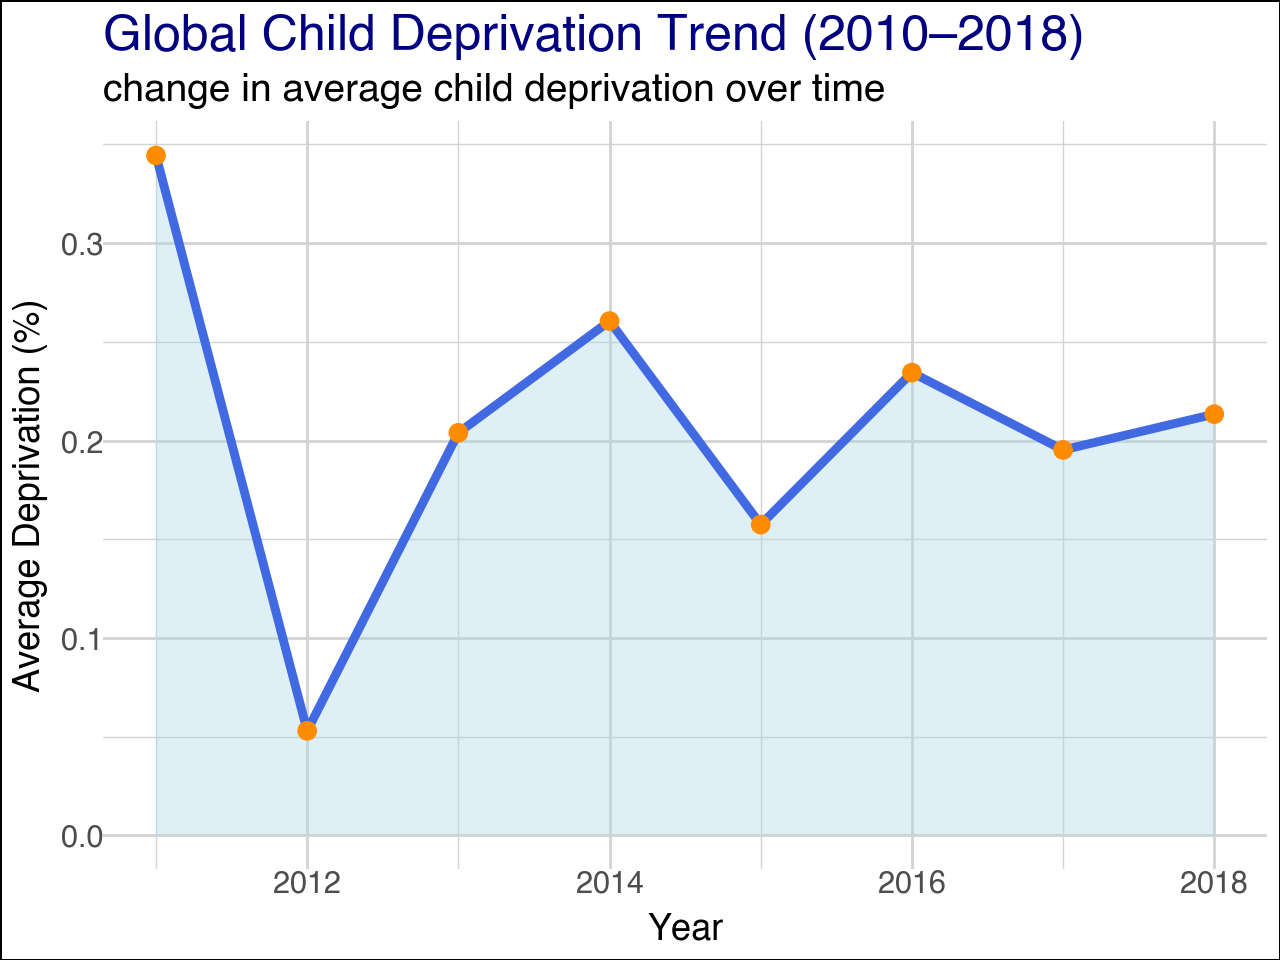

In [8]:

df = pd.read_csv("unicef_indicator_1.csv")


df = df[df["sex"] == "Total"]
df = df.rename(columns={"obs_value": "deprivation", "time_period": "year"})


avg_deprivation = (
    df.groupby("year")["deprivation"]
    .mean()
    .reset_index()
)


avg_deprivation = avg_deprivation[avg_deprivation["year"].between(2010, 2018)]


(
    ggplot(avg_deprivation)
    + aes(x="year", y="deprivation")
    + geom_area(fill="lightblue", alpha=0.4)
    + geom_line(color="royalblue", size=1.8)
    + geom_point(color="darkorange", size=3)
    + labs(
        title="Global Child Deprivation Trend (2010–2018)",
        subtitle="change in average child deprivation over time",
        x="Year",
        y="Average Deprivation (%)"
    )
    + theme_minimal()
    + theme(
        plot_title=element_text(size=18, color="navy"),
        plot_subtitle=element_text(size=14),
        axis_title=element_text(size=13),
        axis_text=element_text(size=11),
        plot_background=element_rect(fill="white"),
        panel_grid_major=element_line(color="lightgrey"),
        panel_grid_minor=element_line(color="lightgrey")
    )
)


This time series reveals how global average child deprivation has evolved across years.  
While some years show progress, **there are periods of stagnation or setbacks**, indicating uneven improvement and the need for continued policy action.


## **What Can Be Done?**

:::{.callout-tip}
**Data without action is just noise.**

**To address this silent crisis, we recommend three urgent interventions**
:::

1. **Universal Basic Services**  
   Every child deserves access to food, healthcare, clean water, and school.

2. **Transparent Reporting**  
   Governments must track and publish child well-being metrics.

3. **Global Solidarity**  
   Richer nations should support the most affected through fair, targeted aid.

> Children are not statistics — they are futures.


::: {.callout-note title="Local Solutions, Lasting Impact"}
From mobile clinics to school meals, **community-based innovations** often achieve more tangible results than large international programs.  
**Listening to local voices** is key to effective and sustainable change.
:::


## **Final Thoughts**
We must change how we talk about development. A country’s success cannot be judged solely by its markets or infrastructure if it leaves its youngest citizens behind.

The story this report tells is not just one of inequality — it is a story of urgency, resilience, and the need for global solidarity.
The futures of millions of children depend on choices we make today.
It is time for child well-being to move from the margins to the center of global priorities.
This report doesn't just visualize data — it **visualizes neglect**.

It asks us: *What happens to the child born in the wrong place, at the wrong time?*

But also:

> *What would happen if we acted?*

Every improvement in deprivation is a step toward a world where **every child has a chance**.


**Data Source**: *UNICEF Global Databases*